In [6]:
%reload_ext autoreload
%autoreload 2

import plot_utils as pu
import utils as ut
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'monospace'

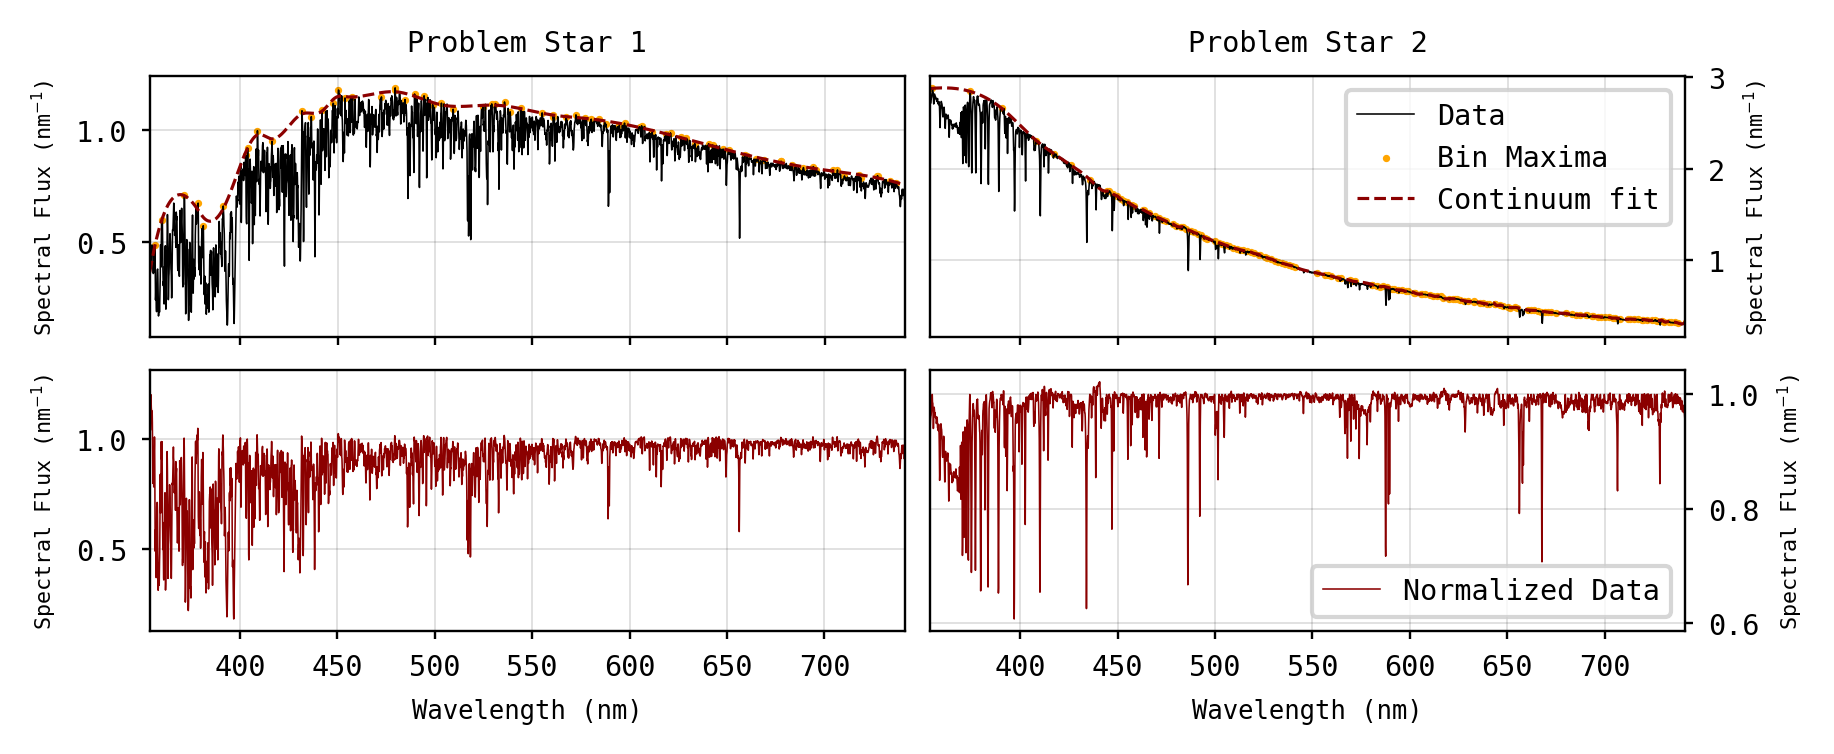

In [7]:
spectra_names = ["starprob1", "starprob2"] 
wavelengths, fluxes, continuums, binmaxs = [], [], [], [] 

# parameters for the fit
clips = [[2,-4],[4,-5]]
windows = [[(3000, 50), (None, 50)],
           [(1000,100), (None, 20)]]
smoothness = [(0.05, 0.01), (0.01, 0)]
std_facts = [0.75, 1]

for i, spectra_name in enumerate(spectra_names):

    fold = "../data/"
    file = fold + spectra_name + ".dat"
    df = pd.read_csv(file, sep="\s+", header=None)
    x, y = df[0].values * 1e-1, df[1].values  # in nm and undetermined flux units
    x, y = ut.dispose_zeros(x, y, clip=clips[i])
    y_cont, y_binmaxs = ut.get_continuum(x, y, windows=windows[i], 
                                         smooth_factor=smoothness[i], return_maxs=True,
                                         envelope_std=std_facts[i])

    wavelengths.append(x)
    fluxes.append(y)
    continuums.append(y_cont)
    binmaxs.append(y_binmaxs)

    # Save a csv file with wavelength and flux

    savefold = '../results/'
    if not os.path.exists(savefold):
        # create the folder if it does not exist
        os.makedirs(savefold)
    figname_norm = spectra_name  + '_norm' + '.csv'
    figname = spectra_name + '.csv'

    df_norm = pd.DataFrame({'wavelength': x, 'flux': y/y_cont})
    df = pd.DataFrame({'wavelength': x, 'flux': y})
    df.to_csv(savefold + figname, index=False)
    df_norm.to_csv(savefold + figname_norm, index=False)

size, rat = 720, 2.5
fig_w, fig_h = size*rat, size
subplots = (2, 2)
lw, ts = 0.1, 1.2
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, 
                                        ratio=None, theme=None, 
                                        subplots=subplots, text_size=ts)

for i in range(len(spectra_names)):
        axs[0][i].plot(wavelengths[i], fluxes[i], c='k', lw=lw*fs, label='Data')
        axs[0][i].scatter(wavelengths[i], binmaxs[i], c='orange', s=0.15*fs, label='Bin Maxima')
        axs[0][i].plot(wavelengths[i], continuums[i], c='darkred', lw=2*lw*fs, ls='--', label='Continuum fit')

        axs[1][i].plot(wavelengths[i], fluxes[i]/continuums[i], c='darkred', lw=lw*fs, label='Normalized Data')

        # remove bottom axis labels of axs[0][i]
        axs[0][i].set_xticklabels([])
        # y axis and y axis tick labels of ax[i][1] to the right
        axs[i][1].yaxis.set_label_position("right")
        axs[i][1].yaxis.tick_right()

        axs[i][0].set_xlim(wavelengths[i][0], wavelengths[i][-1])
        axs[i][1].set_xlim(wavelengths[i][0], wavelengths[i][-1])


        axs[1][i].set_xlabel('Wavelength (nm)', fontsize=1.35*ts*fs)

        for j in range(2):
              axs[i][j].set_ylabel('Spectral Flux (nm$^{-1}$)', fontsize=1.15*ts*fs)

        
axs[0][1].legend(loc='upper right', fontsize=1.5*ts*fs)
axs[1][1].legend(loc='lower right', fontsize=1.5*ts*fs)

# set title of each subplot
axs[0][0].set_title('Problem Star 1', fontsize=1.5*ts*fs)
axs[0][1].set_title('Problem Star 2', fontsize=1.5*ts*fs)

savefold = '../figures/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = 'prob_spectra_and_norm.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')


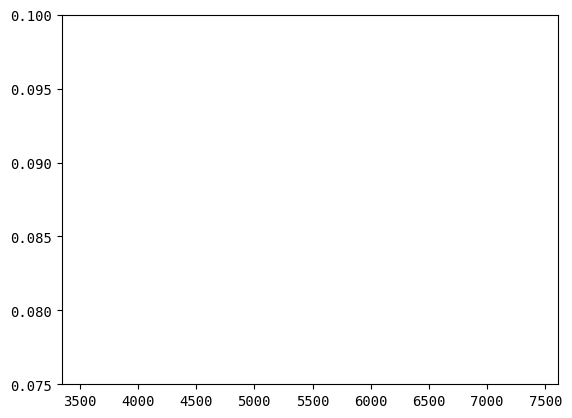

In [36]:
x = x*10
# compute steps on x (ie the difference)
dx = np.diff(x)

plt.plot(x[:-1], np.abs(dx), lw=1)
# set xlim
plt.ylim(0.75e-1, 1e-1)

plt.show()

In [40]:
3900e-10/0.9e-10

4333.333333333334

In [41]:
5000e-10/0.9e-10

5555.555555555556